In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("IM_after_preproc.csv")

In [3]:
#Меня не устраивает что  в train_test_split может в тестовую выборку попасть 0 инфарктов или все 100
#поэтому разделю вручную и соеденю после деления обратно
df_heartattack_x = df[df['IM']==1].iloc[:, 1:]
df_heartattack_y = df[df['IM']==1].iloc[:, 0]
df_no_heartattack_x = df[df['IM']==0].iloc[:, 1:]
df_no_heartattack_y = df[df['IM']==0].iloc[:, 0]

df_heartattack_x_train, df_heartattack_x_test, df_heartattack_y_train, df_heartattack_y_test = train_test_split(df_heartattack_x, df_heartattack_y, test_size=0.2)
df_no_heartattack_x_train, df_no_heartattack_x_test, df_no_heartattack_y_train, df_no_heartattack_y_test = train_test_split(df_no_heartattack_x, df_no_heartattack_y, test_size=0.2)

x_train = pd.concat((df_heartattack_x_train, df_no_heartattack_x_train), axis=0)
y_train = pd.concat((df_heartattack_y_train, df_no_heartattack_y_train), axis=0)
x_test = pd.concat((df_heartattack_x_test, df_no_heartattack_x_test), axis=0)
y_test = pd.concat((df_heartattack_y_test, df_no_heartattack_y_test), axis=0)

1.Случайные деревья

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
assumption = round(np.sqrt(x_train.shape[0]))
iter_n_estimators = list(range(100, 900, 50))
iter_max_features = list(range(5, 9))
iter_max_depth = list(range(5, 14))

#все возможные комбинации параметров
a = [iter_n_estimators, iter_max_features, iter_max_depth]
iters = [list(x) for x in np.array(np.meshgrid(*a)).T.reshape(-1,len(a))]#все возможные комбинации параметров

In [5]:
from tqdm import tqdm

results = {'iter_n_estimators':[], 'iter_max_features':[], 'iter_max_depth':[],
            'train_recall_score':[], 'train_f1_score':[], 'train_precision_score':[],
            'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}

for i in tqdm(iters):
    results['iter_n_estimators'].append(i[0])
    results['iter_max_features'].append(i[1])
    results['iter_max_depth'].append(i[2])
    model = RandomForestClassifier(max_depth=i[2], max_features=i[1], n_estimators=i[0])
    model.fit(x_train, y_train)
    test_y_pred = model.predict(x_test)
    train_y_pred = model.predict(x_train)
    results['train_recall_score'].append(recall_score(y_train, train_y_pred))
    results['train_f1_score'].append(f1_score(y_train, train_y_pred))
    results['train_precision_score'].append(precision_score(y_train, train_y_pred))
    results['test_recall_score'].append(recall_score(y_test, test_y_pred))
    results['test_f1_score'].append(f1_score(y_test, test_y_pred))
    results['test_precision_score'].append(precision_score(y_test, test_y_pred))

100%|██████████| 576/576 [09:44<00:00,  1.02s/it]


In [6]:
df_results=pd.DataFrame(results)
df_results

,iter_n_estimators,iter_max_features,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
0,100,5,5,0.773585,0.866197,0.984000,0.675,0.760563,0.870968
1,100,6,5,0.786164,0.874126,0.984252,0.700,0.777778,0.875000
2,100,7,5,0.779874,0.873239,0.992000,0.700,0.767123,0.848485
3,100,8,5,0.792453,0.881119,0.992126,0.700,0.777778,0.875000
4,150,5,5,0.779874,0.873239,0.992000,0.700,0.788732,0.903226
...,...,...,...,...,...,...,...,...,...
571,800,8,13,1.000000,1.000000,1.000000,0.725,0.794521,0.878788
572,850,5,13,1.000000,1.000000,1.000000,0.700,0.777778,0.875000
573,850,6,13,1.000000,1.000000,1.000000,0.725,0.794521,0.878788
574,850,7,13,1.000000,1.000000,1.000000,0.750,0.810811,0.882353


In [7]:
df_results[df_results['test_recall_score']==df_results['test_recall_score'].max()]

,iter_n_estimators,iter_max_features,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
386,100,7,11,0.987421,0.993671,1.0,0.775,0.805195,0.837838


In [8]:
df_results[df_results['test_precision_score']==df_results['test_precision_score'].max()]

,iter_n_estimators,iter_max_features,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
262,150,7,9,0.937107,0.967532,1.0,0.75,0.821918,0.909091
448,100,5,12,0.993711,0.996845,1.0,0.75,0.821918,0.909091


In [10]:
df_results[df_results['test_f1_score']==df_results['test_f1_score'].max()]

,iter_n_estimators,iter_max_features,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
262,150,7,9,0.937107,0.967532,1.0,0.75,0.821918,0.909091
448,100,5,12,0.993711,0.996845,1.0,0.75,0.821918,0.909091


In [12]:
df_results.iloc[262]

iter_n_estimators        150.000000
iter_max_features          7.000000
iter_max_depth             9.000000
train_recall_score         0.937107
train_f1_score             0.967532
train_precision_score      1.000000
test_recall_score          0.750000
test_f1_score              0.821918
test_precision_score       0.909091
Name: 262, dtype: float64

[[77  4]
 [12 28]] 
 roc_auc_score 0.9003086419753086
 rec: 0.7
 prec: 0.875
 f1: 0.7777777777777777



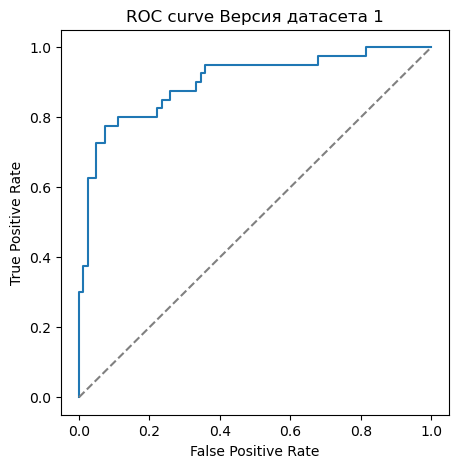

In [13]:
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score
model = RandomForestClassifier(max_depth=9, max_features=7, n_estimators=150)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)
y_proba = y_proba[:, 1]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), '\n', 
f'roc_auc_score {roc_auc_score(y_test, y_proba)}\n', 
f'rec: {recall_score(y_test, y_pred)}\n',
f'prec: {precision_score(y_test, y_pred)}\n',
f'f1: {f1_score(y_test, y_pred)}\n',
)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
plt.rcParams['figure.figsize'] = 5, 5
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Версия датасета 1')
plt.show()

In [14]:
from tqdm import tqdm

prediction = model.predict_proba(x_test)
threshold_results = {'threshold':[], 'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
iters = prediction[:, 1].copy()
iters.sort()
iters = np.unique(iters)

for i in tqdm(iters[:300]):
    predict_mine = []
    for i2 in prediction:
        if i2[1]>i:
            predict_mine.append(1)
        else:
            predict_mine.append(0)
            
    threshold_results['threshold'].append(i)
    threshold_results['test_recall_score'].append(recall_score(y_test, predict_mine))
    threshold_results['test_f1_score'].append(f1_score(y_test, predict_mine))
    threshold_results['test_precision_score'].append(precision_score(y_test, predict_mine))

 99%|█████████▉| 118/119 [00:00<00:00, 171.14it/s]e:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 119/119 [00:00<00:00, 163.31it/s]


In [15]:
df_threshold_results = pd.DataFrame(threshold_results)
df_threshold_results

,threshold,test_recall_score,test_f1_score,test_precision_score
0,0.009358,1.000,0.500000,0.333333
1,0.009805,1.000,0.503145,0.336134
2,0.010099,1.000,0.506329,0.338983
3,0.010288,1.000,0.509554,0.341880
4,0.010604,1.000,0.512821,0.344828
...,...,...,...,...
114,0.947619,0.100,0.181818,1.000000
115,0.953333,0.075,0.139535,1.000000
116,0.957333,0.050,0.095238,1.000000
117,0.958333,0.025,0.048780,1.000000


Text(0, 0.5, 'метрика')

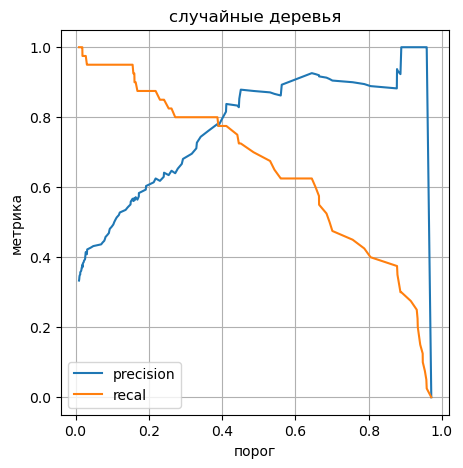

In [18]:
import matplotlib.pyplot as plt
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_precision_score'], label='precision')
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_recall_score'], label='recal')
plt.grid()
plt.legend()
plt.title('случайные деревья')
plt.xlabel('порог')
plt.ylabel('метрика')